In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns',None)

In [3]:
df = pd.read_csv('D:\OneDrive\Data Science\Projects\Warehouse Stock Management\Data.csv')

In [4]:
df.shape

(25000, 24)

In [5]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


**product_wg_ton - the optimum weight of the product to be shipped each time to the warehouse**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

## EDA

**Missing values**

In [7]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

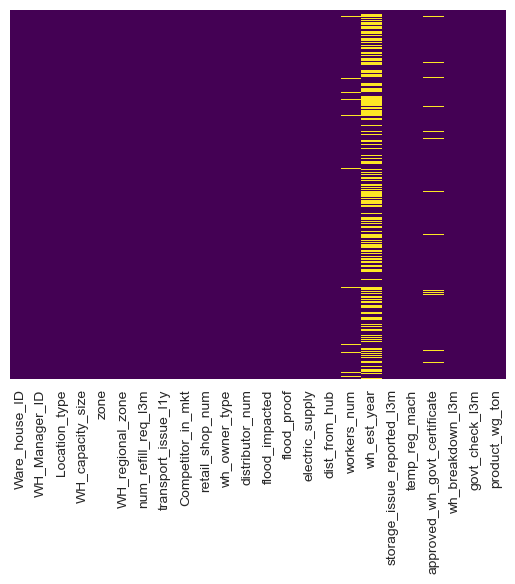

In [8]:
sns.heatmap(df.isnull(),cmap = 'viridis', yticklabels = False,cbar = False)
plt.show()

In [9]:
missing_values = df.isnull().sum().sort_values(ascending=False).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values['missing_perc'] = missing_values['missing_count']/df.shape[0]*100
missing_values = missing_values.sort_values(by='missing_perc',ascending = False)

missing_values

,column_name,missing_count,missing_perc
0,wh_est_year,11881,47.524
1,workers_num,990,3.960
2,approved_wh_govt_certificate,908,3.632


* **~47.5% values are missing in "wh_est_year" column**

**Numeric, Categorical ,Numeric but Categorical & High Cardinality features**

In [10]:
def segg_features(dataframe, cat_th=15, car_th=20):
    
    categorical_features = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # Numerical but categorical features
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    # Categorical features with high cardinality 
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Total categorical features
    categorical_features = categorical_features + num_but_cat
    categorical_features = [col for col in categorical_features if col not in cat_but_car]

    # Total numerical columns
    numeric_features = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numeric_features = [col for col in numeric_features if col not in num_but_cat]

    print(f"Total features: {dataframe.shape[1]}")
    print(f'Numeric but categorical features: {len(num_but_cat)}')
    print(f'Categorical_features including numeric categorical features: {len(categorical_features)}')
    print(f'Numeric_features: {len(numeric_features)}')
    print(f'Categorical_features with high cardinality: {len(cat_but_car)}')
    
    return categorical_features, numeric_features, cat_but_car

In [11]:
len(df['wh_est_year'].unique())

29

In [12]:
categorical_features, numeric_features, cat_but_car = segg_features(df)

Total features: 24
Numeric but categorical features: 8
Categorical_features including numeric categorical features: 14
Numeric_features: 8
Categorical_features with high cardinality: 2


In [13]:
print(cat_but_car)

['Ware_house_ID', 'WH_Manager_ID']


In [14]:
print(numeric_features)

['retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'govt_check_l3m', 'product_wg_ton']


In [15]:
print(categorical_features)

['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach', 'wh_breakdown_l3m']


**Numerical features**

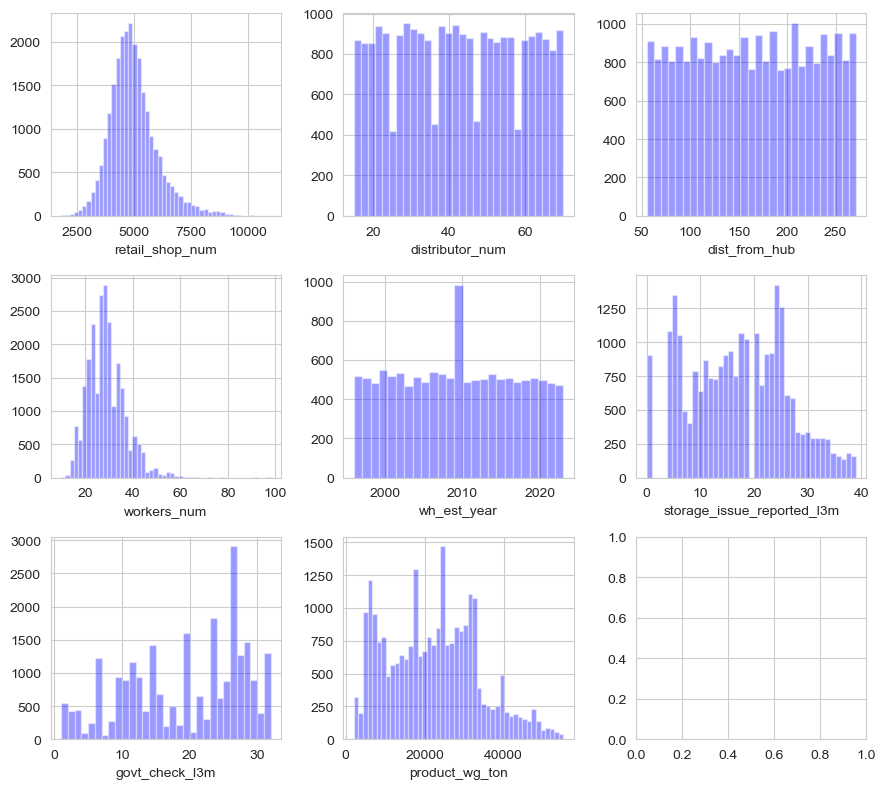

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(9, 8))
ax = ax.flatten()
index = 0
for i in numeric_features:
  sns.distplot(df[i], ax=ax[index],kde = False,color = 'b')
  index +=1
plt.tight_layout()
plt.show()

* **Features 'distributor_num','dist_from_hub' are uniformly distributed.**
* **Features 'retail_shop_num','workers_num' are fairly normally distributed.**

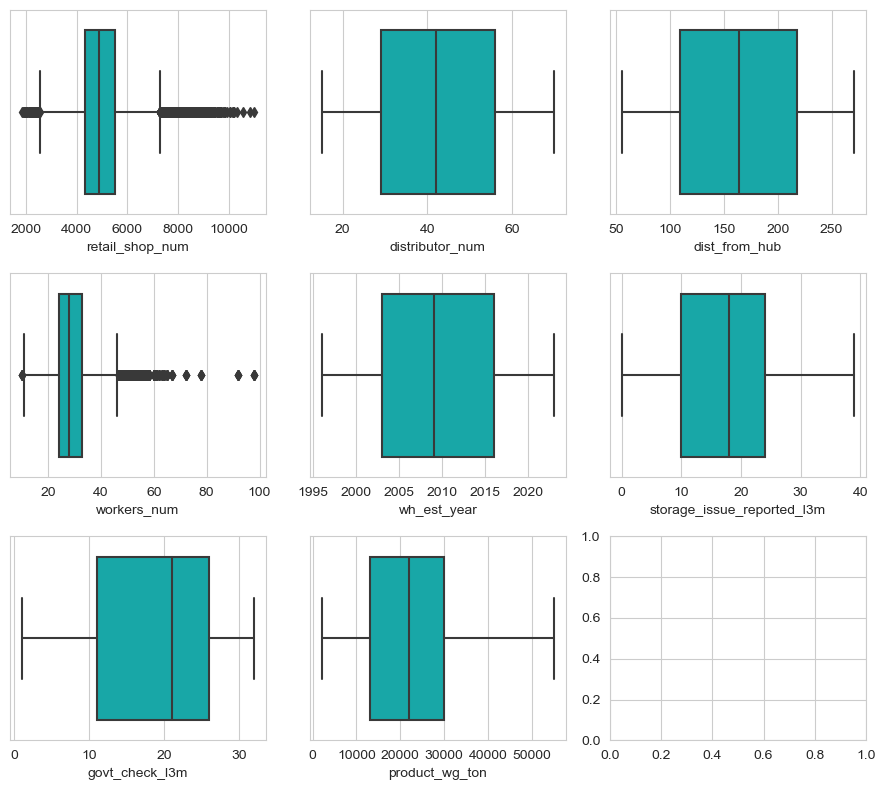

In [17]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(9, 8))
ax = ax.flatten()
index = 0
for i in numeric_features:
  sns.boxplot(data = df,x = i, ax=ax[index],color = 'c')
  index +=1
plt.tight_layout()
plt.show()

In [18]:
def outliers_iqr(data):
    outliers_iqr = pd.DataFrame(columns = ['Column','Outlier_count','Outlier_percentage'])
    for i in data.columns:
      data.sort_values(by=i, ascending=True, na_position='last')
      q1, q3 = np.nanpercentile(data[i], [25,75])
      iqr = q3-q1
      lower_bound = q1-(1.5*iqr)
      upper_bound = q3+(1.5*iqr)
      outlier_data = data[i][(data[i] < lower_bound) | (data[i] > upper_bound)] #creating a series of outlier data
      perc = (outlier_data.count()/data[i].count())*100
      outliers_iqr = outliers_iqr.append({'Column':i,'Outlier_count':outlier_data.count(),'Outlier_percentage':perc},ignore_index = True)
    outliers_iqr = outliers_iqr.sort_values('Outlier_percentage',ascending = False)
    return outliers_iqr

* **Features retail_shop_num,workers_num have outliers**

In [19]:
skew_kurt = df[numeric_features].skew().reset_index().rename(columns = {'index':'Feature',0:'Skewness'})
skew_kurt['Kurtosis'] = df[numeric_features].kurt().values

skew_kurt

,Feature,Skewness,Kurtosis
0,retail_shop_num,0.908302,1.851946
1,distributor_num,0.015213,-1.187564
2,dist_from_hub,-0.005999,-1.200682
3,workers_num,1.059911,3.409335
4,wh_est_year,0.012417,-1.175888
5,storage_issue_reported_l3m,0.113345,-0.680142
6,govt_check_l3m,-0.363262,-1.057342
7,product_wg_ton,0.331631,-0.502022


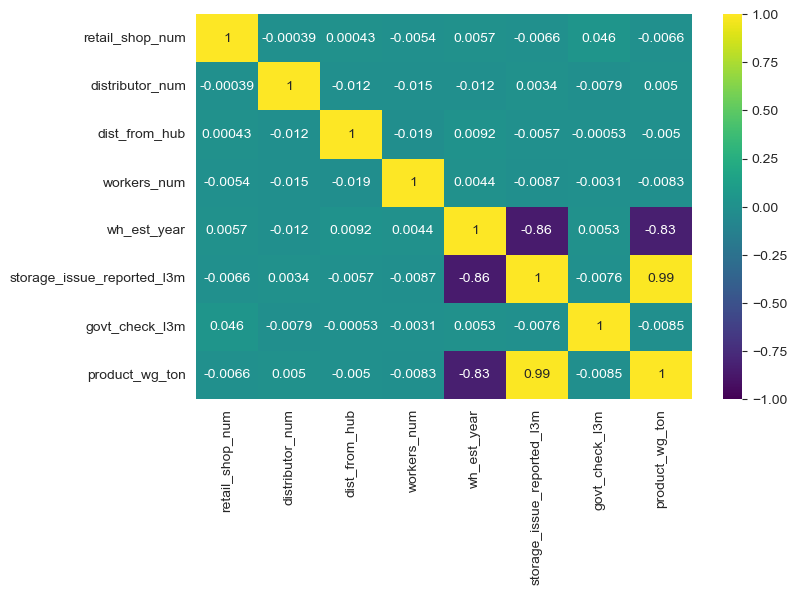

In [20]:
# Correlation heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df[numeric_features].corr(),vmin = -1,vmax = 1,annot = True,cmap = 'viridis')
plt.show()

* **Feature 'storage_issue_reported_l3m' has strong correlation with dependent feature 'product_wg_ton'**
* **Feature wh_est_year' has negative correlation with the dependent feature.**
    * **This indicates large volumes of product have been shipped to older warehouses in the last 3 months compared to newer ones.**

<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

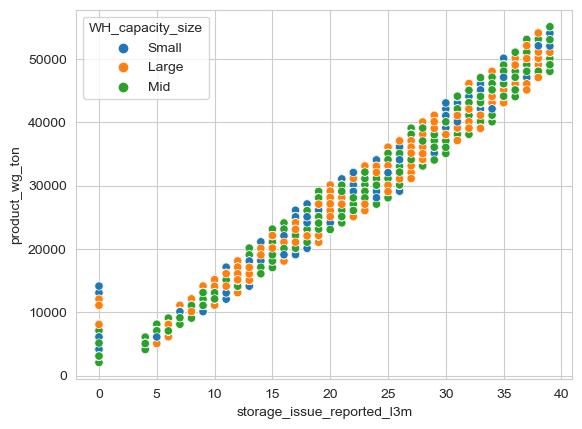

In [21]:
sns.scatterplot(x = 'storage_issue_reported_l3m',y = 'product_wg_ton',data = df,hue = 'WH_capacity_size')

<Axes: xlabel='wh_est_year', ylabel='product_wg_ton'>

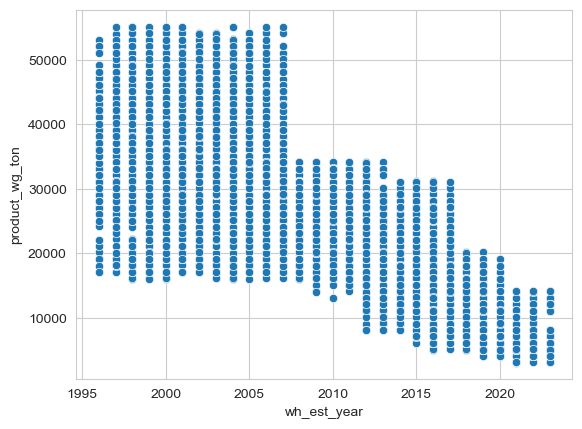

In [22]:
sns.scatterplot(x = 'wh_est_year',y = 'product_wg_ton',data = df)

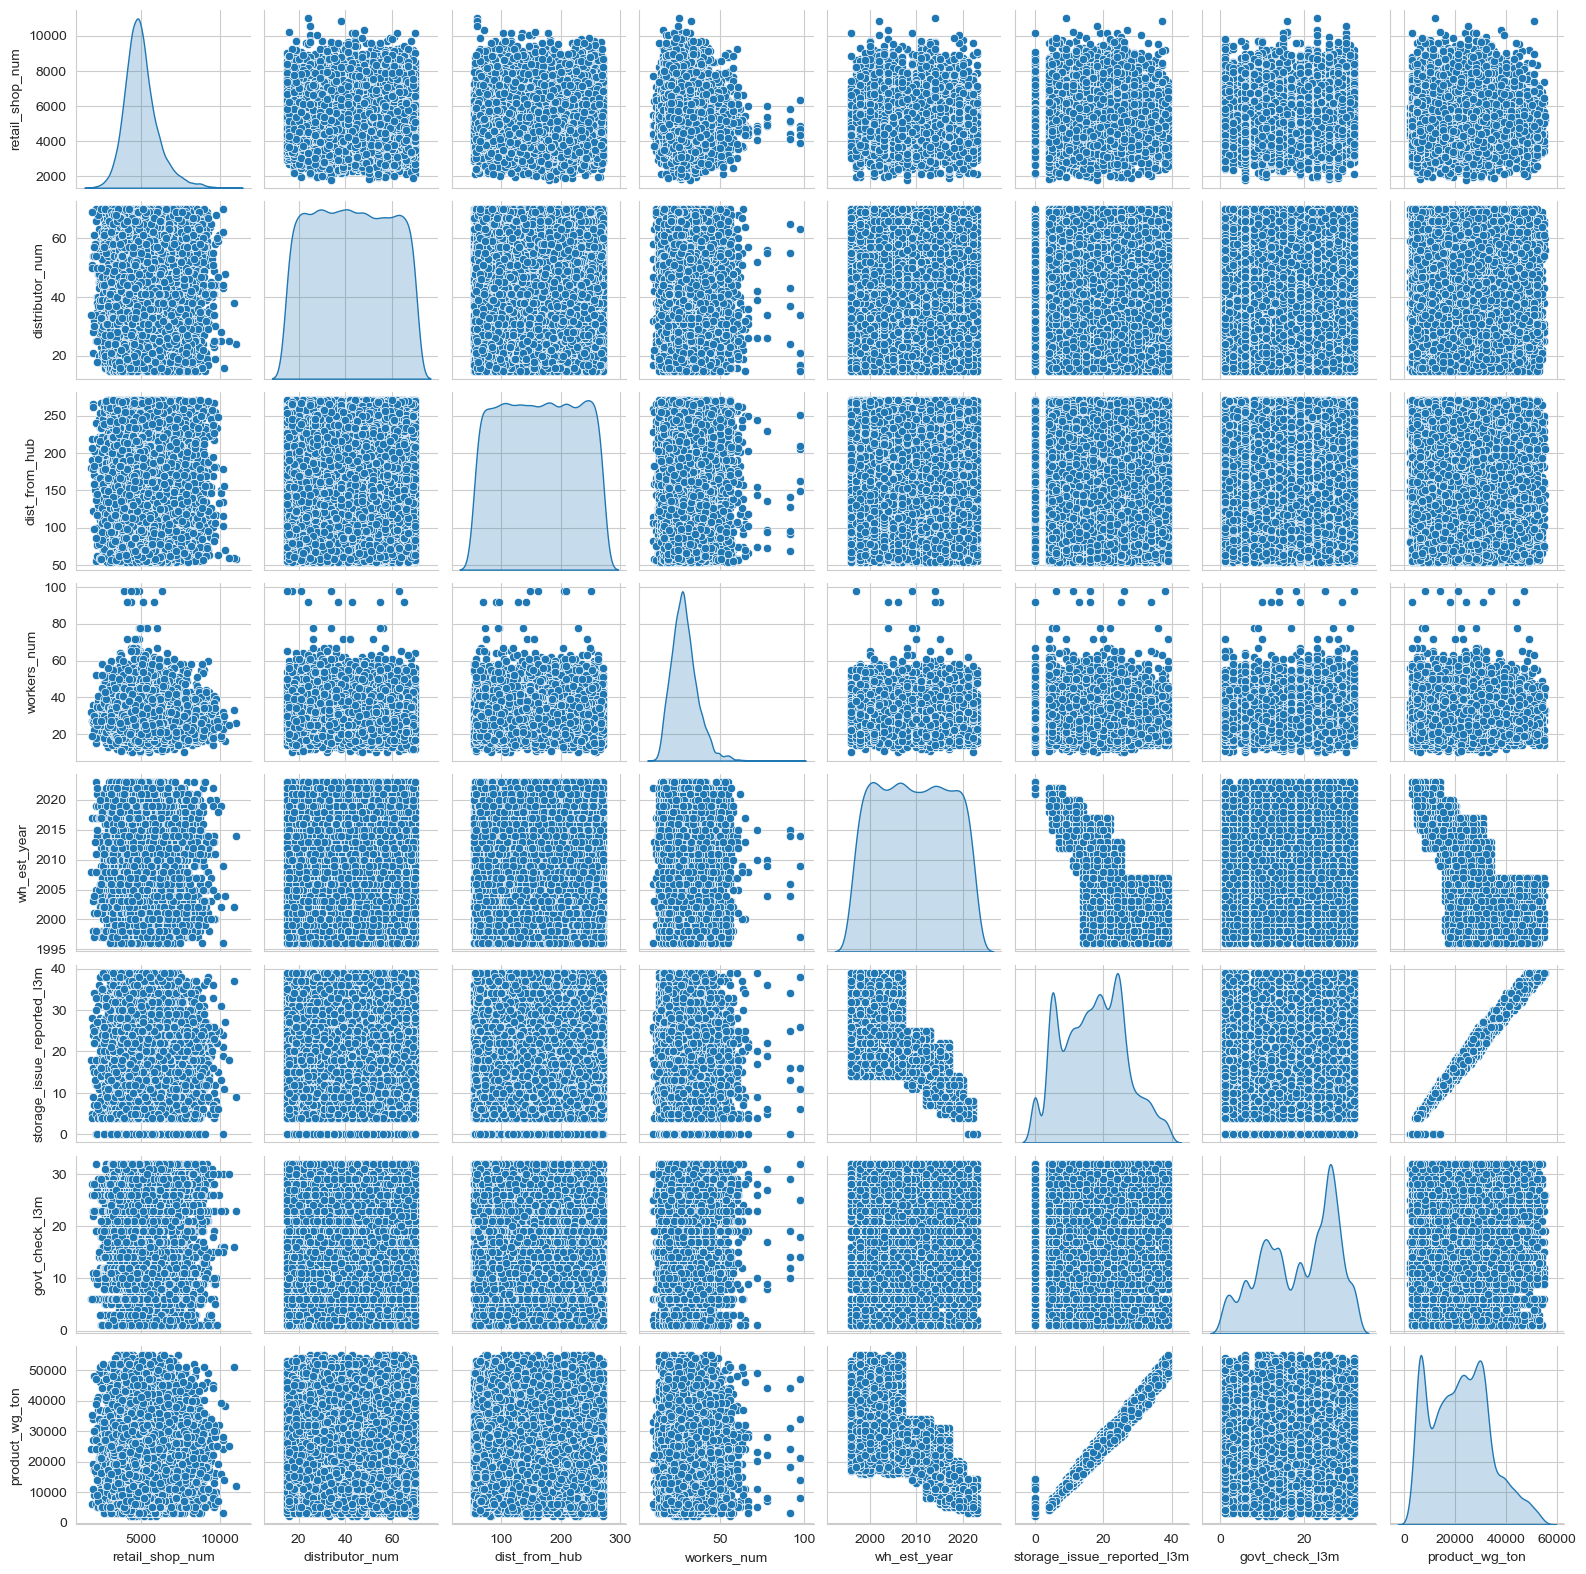

In [23]:
sns.pairplot(df[numeric_features],height = 2 ,kind ='scatter',diag_kind='kde')

**Categorical features**

In [24]:
df_cat = df[categorical_features]
df_cat = df_cat.astype('O')

In [25]:
df_cat.describe(include = 'all').T.sort_values(by = 'unique')

,count,unique,top,freq
Location_type,25000,2,Rural,22957
wh_owner_type,25000,2,Company Owned,13578
flood_impacted,25000,2,0,22546
flood_proof,25000,2,0,23634
electric_supply,25000,2,1,16422
temp_reg_mach,25000,2,0,17418
WH_capacity_size,25000,3,Large,10169
zone,25000,4,North,10278
approved_wh_govt_certificate,24092,5,C,5501
WH_regional_zone,25000,6,Zone 6,8339


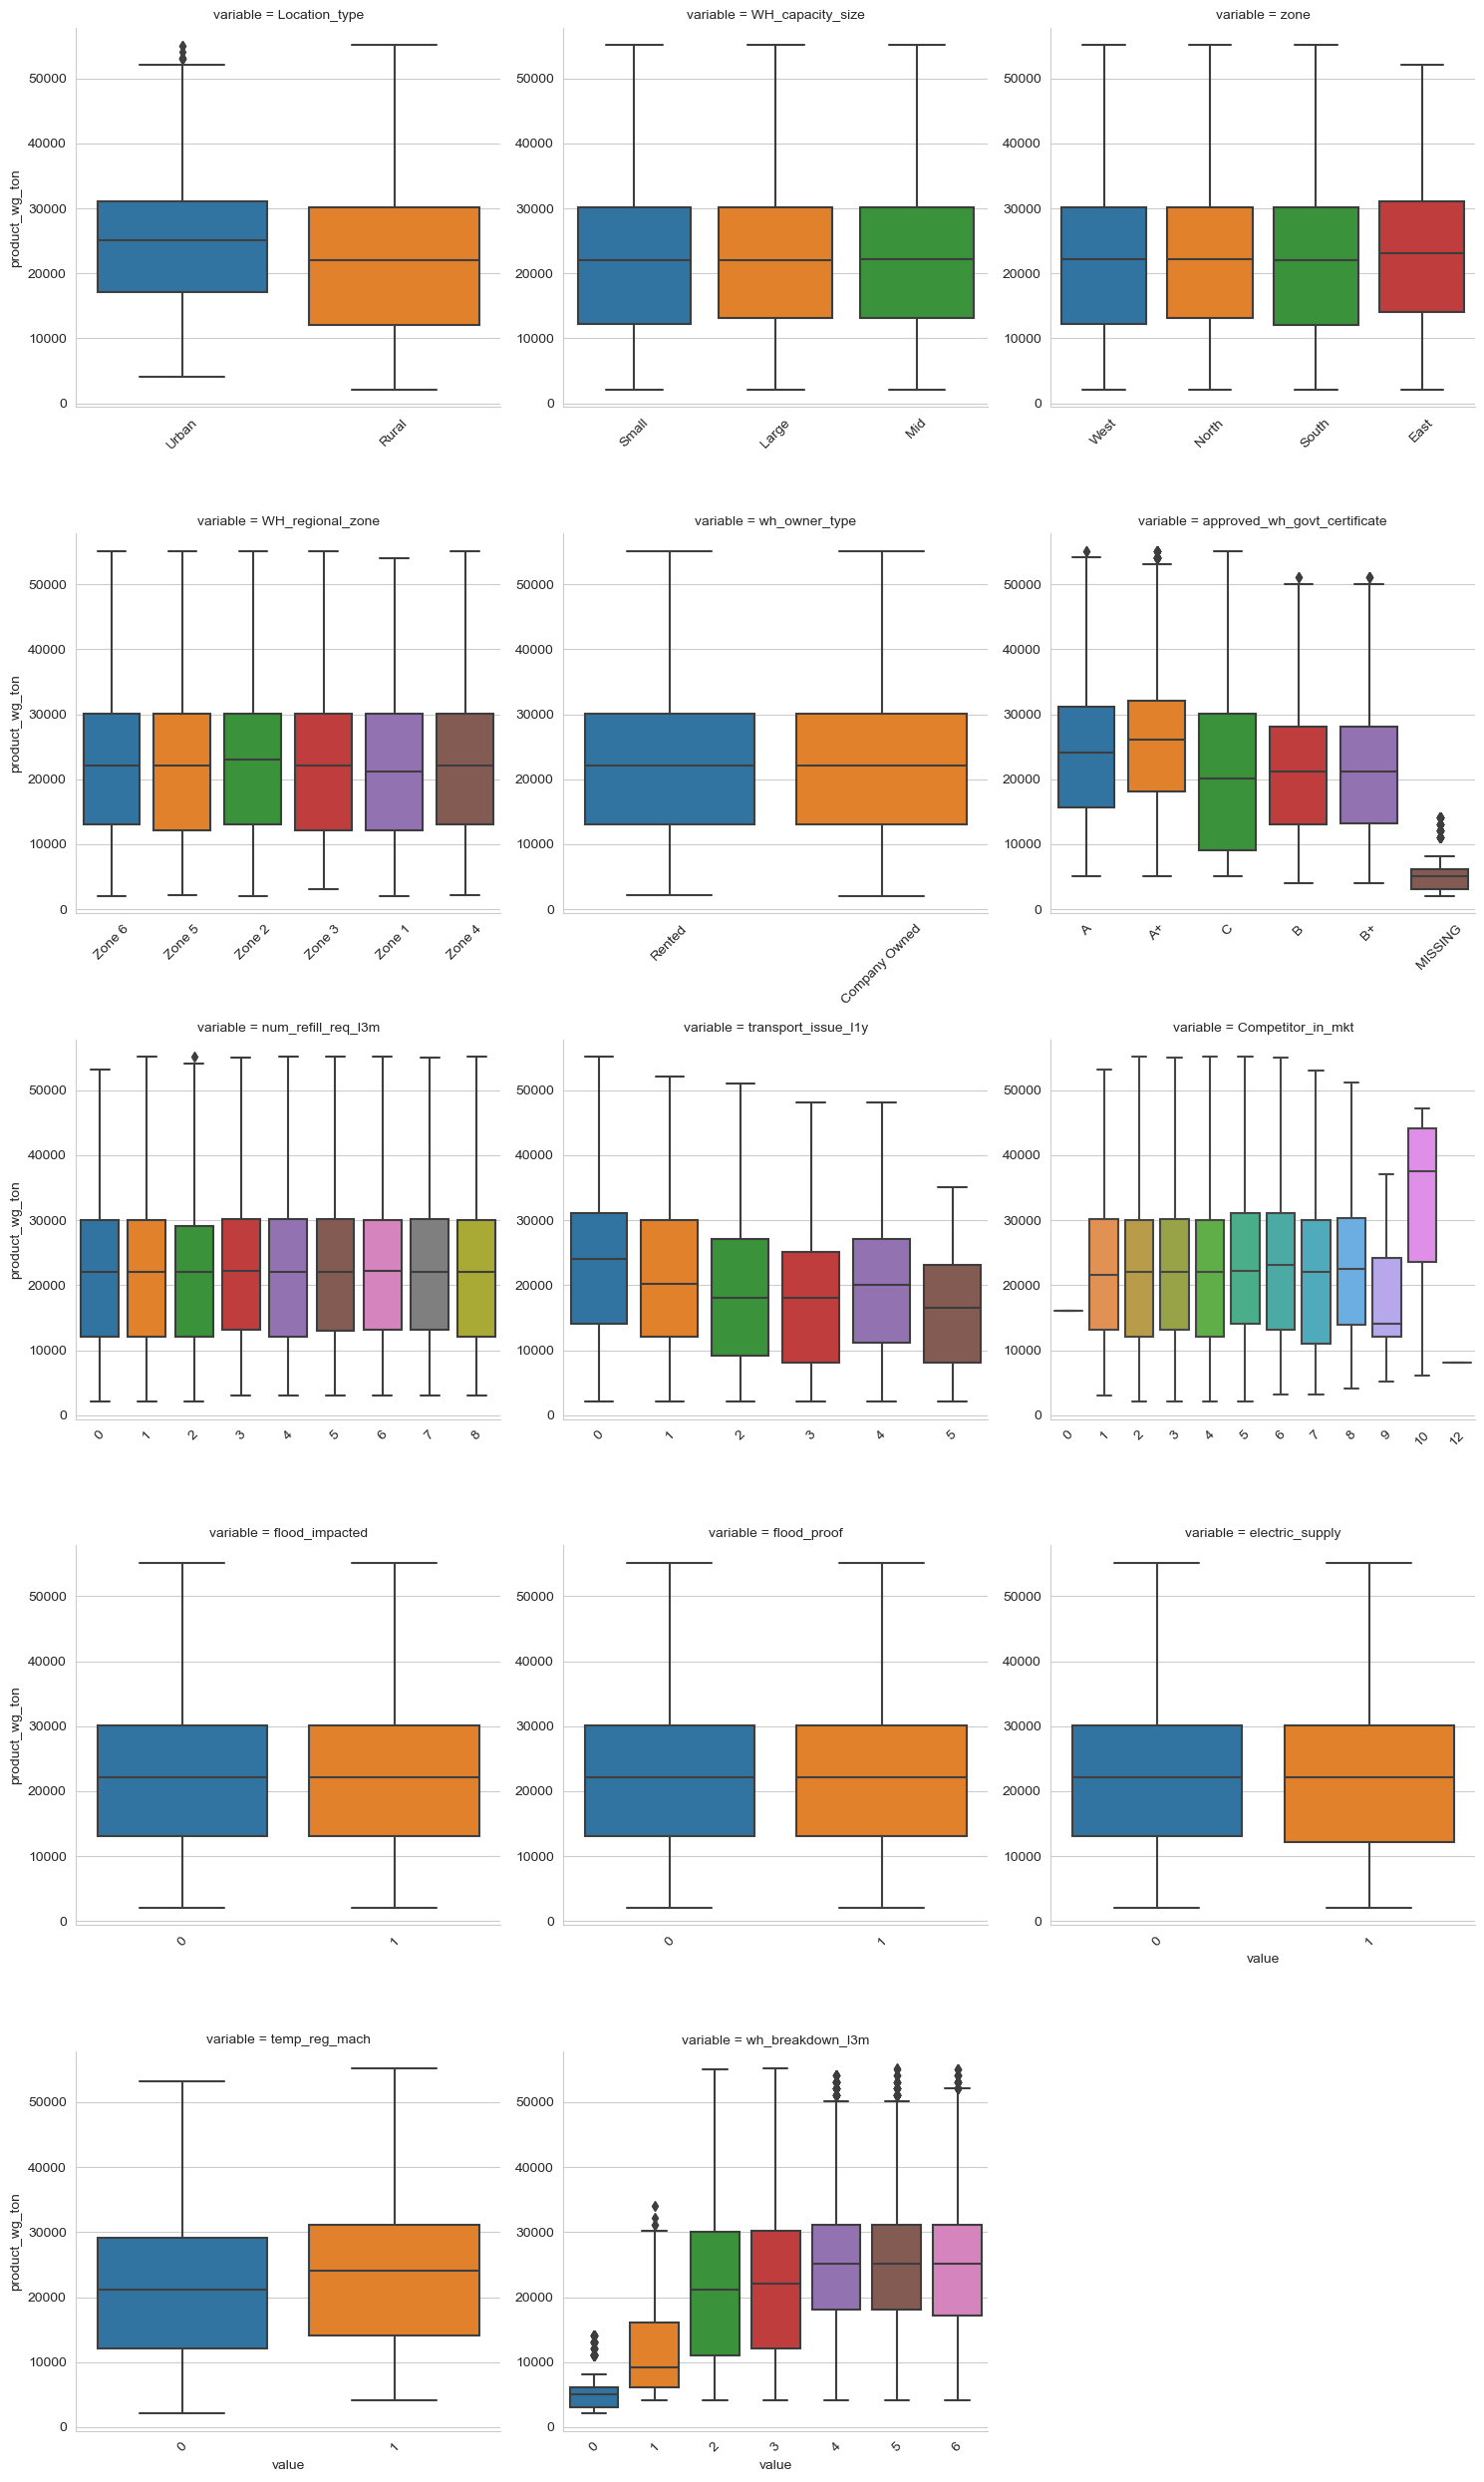

In [26]:
df_cat['product_wg_ton'] = df['product_wg_ton']
for c in categorical_features:
    df_cat[c] = df_cat[c].astype('category')
    if df_cat[c].isnull().any():
        df_cat[c] = df_cat[c].cat.add_categories(['MISSING'])
        df_cat[c] = df_cat[c].fillna('MISSING')
        
        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=45)
    
f = pd.melt(df_cat, id_vars=['product_wg_ton'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "product_wg_ton")

* **"WH_capacity_size" -  Above chart indicates,the amount of product shipped is independent of Warehouse capacity size**
    * **Which also means, that the smaller warehouses may be overutilised & larger warehouses may be underutilised.**

## Data Pre-processing

In [27]:
df1 = df.copy()

**Dropping id features**

In [28]:
df1.drop(columns = ['WH_Manager_ID','Ware_house_ID'],inplace = True)

**Feature Engineering**

* Since 'Competitor_in_mkt' has high cardinality, splitting the feature into 3 categories

In [29]:
zero_to_two_mask = df1['Competitor_in_mkt'].isin([0,1,2])
three_to_five_mask = df1['Competitor_in_mkt'].isin([3,4,5])
more_than_five_mask = df1['Competitor_in_mkt'] > 5

In [30]:
df1.loc[zero_to_two_mask,'num_competitors'] = '0-2'
df1.loc[three_to_five_mask,'num_competitors'] = '3-5'
df1.loc[more_than_five_mask,'num_competitors'] = 'More_than_5'

In [31]:
df1.drop(columns = ['Competitor_in_mkt'],inplace = True)

* Splitting the 'wh_est_year' feature into below categories:
    * Very Old- Established year 2000 & below 
    * Old- Established year between 2001 & 2010 (both included)
    * New- Established year between 2011 & 2020 (both included)
    * Recent- Established year 2021 and above.

In [32]:
veryold_mask = df1['wh_est_year'] < 2001
old_mask = (df1['wh_est_year'] > 2000) &  (df1['wh_est_year'] < 2011)
new_mask = (df1['wh_est_year'] > 2011) &  (df1['wh_est_year'] < 2021)
recent_mask = df1['wh_est_year'] > 2020

In [33]:
df1.loc[veryold_mask,'wh_age'] = 'very_old'
df1.loc[old_mask,'wh_age'] = 'old'
df1.loc[new_mask,'wh_age'] = 'new'
df1.loc[recent_mask,'wh_age'] = 'recent'

In [34]:
df1.drop(columns = ['wh_est_year'],inplace = True)

Seperating Dependent & Independent features
* Dropping 'Ware_house_ID' & 'WH_Manager_ID' columns.

In [35]:
X = df1.drop(columns = ['product_wg_ton'])
y = df1['product_wg_ton']

**Train-Test-split**

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [37]:
X_train.shape,y_train.shape

((20000, 21), (20000,))

In [38]:
X_test.shape,y_test.shape

((5000, 21), (5000,))

**Handling missing values**

* workers_num -  The distribution of 'workers_num' column is fairly normal,therefore filling with mean values
* approved_wh_govt_certificate - Imputing missing values with mode
* wh_age - More than 45% values are missing, therefore creating an additional category - 'missing'

In [39]:
X_train_miss = X_train.copy()

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
impute_mean = SimpleImputer(strategy='mean')
X_train_miss['workers_num'] = impute_mean.fit_transform(X_train_miss[['workers_num']])
X_test['workers_num'] = impute_mean.transform(X_test[['workers_num']])

In [42]:
impute_mode = SimpleImputer(strategy='most_frequent')
X_train_miss['approved_wh_govt_certificate'] = impute_mode.fit_transform(X_train_miss[['approved_wh_govt_certificate']])
X_test['approved_wh_govt_certificate'] = impute_mode.transform(X_test[['approved_wh_govt_certificate']])

In [43]:
impute_missing = SimpleImputer(strategy='constant',fill_value = 'missing')
X_train_miss['wh_age'] = impute_missing.fit_transform(X_train_miss[['wh_age']])
X_test['wh_age'] = impute_missing.transform(X_test[['wh_age']])

**Handling outliers**

In [44]:
numeric_features_updated = ['retail_shop_num','distributor_num','dist_from_hub', 'workers_num','storage_issue_reported_l3m','govt_check_l3m']
outliers_iqr(X_train_miss[numeric_features_updated])

,Column,Outlier_count,Outlier_percentage
0,retail_shop_num,754,3.77
3,workers_num,478,2.39
1,distributor_num,0,0.00
2,dist_from_hub,0,0.00
4,storage_issue_reported_l3m,0,0.00
5,govt_check_l3m,0,0.00


* Applying log transform on 'retail_shop_num' & 'workers_num' features

In [45]:
X_train_out = X_train_miss.copy()

In [46]:
X_train_out['retail_shop_num'] = np.log(X_train_out['retail_shop_num'])
X_test['retail_shop_num'] = np.log(X_test['retail_shop_num'])

In [47]:
X_train_out['workers_num'] = np.log(X_train_out['workers_num'])
X_test['workers_num'] = np.log(X_test['workers_num'])

**Feature Encoding**

In [48]:
X_train_enc = X_train_out.copy()

In [49]:
ordinals = ['WH_capacity_size','approved_wh_govt_certificate','wh_age']
nominas = ['Location_type','zone','WH_regional_zone','wh_owner_type','num_competitors']

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
ord1 = OrdinalEncoder(categories = [['Small','Mid','Large']])
X_train_enc['WH_capacity_size'] = ord1.fit_transform(X_train_enc[['WH_capacity_size']])
X_test['WH_capacity_size'] = ord1.transform(X_test[['WH_capacity_size']])

In [52]:
ord2 = OrdinalEncoder(categories = [['C', 'B', 'B+', 'A', 'A+']])
X_train_enc['approved_wh_govt_certificate'] = ord2.fit_transform(X_train_enc[['approved_wh_govt_certificate']])
X_test['approved_wh_govt_certificate'] = ord2.transform(X_test[['approved_wh_govt_certificate']])

Assigning order to wh_age categories based on below EDA insight:
* Large volumes of product have been shipped to older warehouses in the last 3 months compared to newer ones.

In [53]:
ord3 = OrdinalEncoder(categories = [['missing', 'recent', 'new', 'old', 'very_old']])
X_train_enc['wh_age'] = ord3.fit_transform(X_train_enc[['wh_age']])
X_test['wh_age'] = ord3.transform(X_test[['wh_age']])

* Dummy encoding nominal features

In [54]:
X_train_enc = pd.get_dummies(X_train_enc,columns = ['Location_type','zone','WH_regional_zone','wh_owner_type','num_competitors'],drop_first = True)
X_test = pd.get_dummies(X_test,columns = ['Location_type','zone','WH_regional_zone','wh_owner_type','num_competitors'],drop_first = True)

**Feature Scaling**

In [55]:
from sklearn.preprocessing import StandardScaler

scaler_norm = StandardScaler()
X_train_std = pd.DataFrame(scaler_norm.fit_transform(X_train_enc),columns = X_train_enc.columns)
X_test_std = pd.DataFrame(scaler_norm.transform(X_test),columns = X_test.columns)

**Model Building**

* ## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr = LinearRegression()
lr.fit(X_train_std,y_train)
y_pred_lr = lr.predict(X_test_std)
print('*****Linear Regression*****')
print('r2_score: ',r2_score(y_test,y_pred_lr))
print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred_lr))

*****Linear Regression*****
r2_score:  0.9769541084006346
mean_absolute_error:  1279.6292556049711


In [57]:
from sklearn.linear_model import SGDRegressor 
sgd = SGDRegressor(early_stopping = False,learning_rate='invscaling',max_iter=10000)
sgd.fit(X_train_std,y_train)
y_pred_sgd = sgd.predict(X_test_std)
print('*****SGD Regression*****')
print('r2_score: ',r2_score(y_test,y_pred_sgd))
print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred_sgd))

*****SGD Regression*****
r2_score:  0.9769135647424082
mean_absolute_error:  1283.412091604372


**Testing the assumptions of Linear Regression**

In [58]:
y_pred = lr.predict(X_train_std)

In [59]:
predictions = pd.DataFrame(y_train).rename(columns = {'product_wg_ton':'y_train'})
predictions['y_pred'] = y_pred
residuals = y_train - y_pred
predictions['residuals'] = residuals

In [60]:
lr.coef_

array([-1.58889861e+01, -4.41940208e+01, -3.36992947e+02, -3.60548841e+00,
        2.96488151e+01,  1.23049852e+01,  1.42813054e+01, -1.62856086e+01,
        1.73509023e+01, -3.81673386e+00,  1.14725117e+04,  3.81161407e+02,
        1.55670471e+02, -3.93799153e+02, -1.86759770e+01,  8.07878484e+01,
       -2.78586607e+01,  6.53032630e+01,  5.07915862e+01,  4.87423858e+01,
       -1.12744472e+01, -1.94927929e+01, -2.41133681e+01, -9.46630603e+00,
       -2.10676641e+01,  4.31333924e+00, -9.96551866e+00,  1.52266419e+01])

**1. Linearity**
* Scatter plot of actual vs predicted values

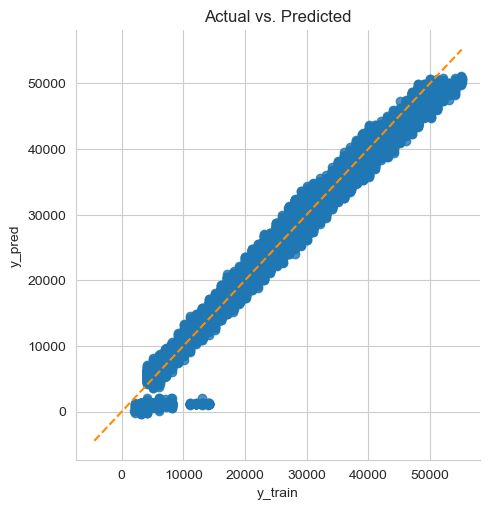

In [61]:
sns.lmplot(x = 'y_train',y = 'y_pred',data = predictions,fit_reg = False)
line_coords = np.arange(predictions.min().min(), predictions.max().max())
plt.plot(line_coords, line_coords,color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

* **We can see a relatively even spread around the diagonal line**

**2. Multicollinearity**
* Checking Variance Inflation Factor of independent features

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def compute_vif(df):
    df = add_constant(df)          # VIF calculation requires addition of a constant variable (debatable)
    vif = pd.DataFrame()
    vif['Variable'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif = vif[vif['Variable'] != 'const']    # removing the constant variable
    return vif.sort_values('VIF',ascending = False)

In [63]:
compute_vif(X_train_miss[X_train_miss.describe().columns])

,Variable,VIF
10,storage_issue_reported_l3m,1.201126
12,wh_breakdown_l3m,1.174016
7,electric_supply,1.154242
9,workers_num,1.143520
11,temp_reg_mach,1.083369
1,num_refill_req_l3m,1.076936
5,flood_impacted,1.051762
2,transport_issue_l1y,1.028710
6,flood_proof,1.023325
13,govt_check_l3m,1.002818


* **VIF of all independent features is below 5.This indicates multicollinearity in the independent features does not exist**

**3. Autocorrelation**
* Durbin-Watson test on the residuals

In [64]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(dw)

2.0144330052983515


* **The value of Durbin-Watson test is close to 2.This indicates there's no autocorrelation in the error terms.**

**4. Homoscedasticity**
* Goldfeld Quandt Test
    * Null Hypothesis: Error terms are homoscedastic
    * Alternate Hypothesis: Error terms are heteroscedastic.

In [65]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train_std)
lzip(name, test)

[('F statistic', 1.0531149362568604), ('p-value', 0.00488613764145948)]

* **p-value > 0.05, we can't reject the null-hypothesis**

**5. Normality of the residuals**

Text(0.5, 1.0, 'Normality of error terms/residuals')

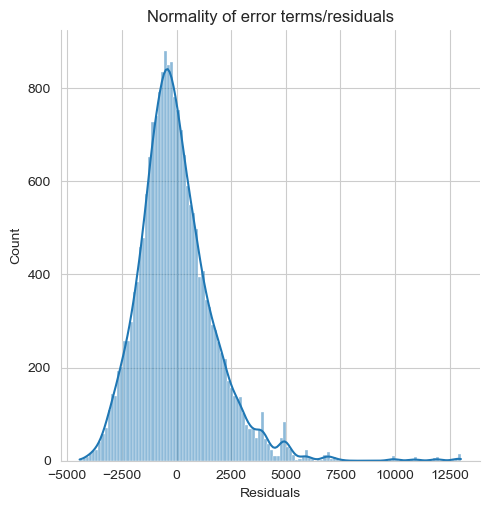

In [66]:
sns.displot(residuals, kde = True)
plt.xlabel('Residuals')
plt.title('Normality of error terms/residuals')

* **Error terms are fairly normally distributed with slight right skewness.** 

* ## Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(estimator = Lasso(random_state = 1),param_grid = {'alpha':np.arange(0,10,0.1)},scoring = 'neg_mean_squared_error',cv = 5)
model.fit(X_train_std,y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=1),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

In [68]:
model.best_params_

{'alpha': 9.0}

In [69]:
coefficients = model.best_estimator_.coef_
importance = np.abs(coefficients)
selected_features = X_train_std.columns[importance > 0]

In [70]:
selected_features

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'wh_age', 'Location_type_Urban', 'zone_North',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'num_competitors_3-5', 'num_competitors_More_than_5'],
      dtype='object')

In [71]:
lasso = Lasso(alpha = 3.6)
lasso.fit(X_train_std[selected_features],y_train)
y_pred_lasso = lasso.predict(X_test_std[selected_features])
print('*****Lasso Regression*****')
print('r2_score: ',r2_score(y_test,y_pred_lasso))
print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred_lasso))

*****Lasso Regression*****
r2_score:  0.9769616753835333
mean_absolute_error:  1279.078274962328


* ### Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500,random_state= 1)
rf.fit(X_train_std,y_train)
y_pred_rf = rf.predict(X_test_std)
print('*****Random Forest Regression*****')
print('r2_score: ',r2_score(y_test,y_pred_rf))
print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred_rf))

*****Random Forest Regression*****
r2_score:  0.9938326702081037
mean_absolute_error:  674.5928956
